# A quick exploration of results

In [42]:
import os
import pandas as pd
from glob import glob
import numpy as np

In [43]:
xgb_res_files = glob("/drive3/nphill22/projects/corsello_lab/20250525_manuscript/data/output/subset/primary/*/xgboost_model/model_performance_summary.csv")
rf_res_files = glob("/drive3/nphill22/projects/corsello_lab/20250525_manuscript/data/output/subset/primary/*/random_forest/model_performance_summary.csv")
linear_res_files = glob("/drive3/nphill22/projects/corsello_lab/20250525_manuscript/data/output/subset/primary/*/linear_model/model_performance_summary.csv")
quantile_res_files = glob("/drive3/nphill22/projects/corsello_lab/20250525_manuscript/data/output/subset/primary/*/quantile_regression/model_performance_summary.csv")


xgb_df = []
rf_df = []
linear_df = []
quantile_df = []

def load_res_files(res_files):
    df = []
    for res_file in res_files:
        df.append(pd.read_csv(res_file))
    # filter to just fold == "overall"
    df = pd.concat(df)
    df = df.loc[df.fold == "overall"]
    return df

xgb_df = load_res_files(xgb_res_files)
rf_df = load_res_files(rf_res_files)
linear_df = load_res_files(linear_res_files)
quantile_df = load_res_files(quantile_res_files)

In [44]:
linear_df.test_pearson.describe()

count    100.000000
mean       0.014455
std        0.075783
min       -0.099759
25%       -0.015318
50%       -0.005456
75%        0.011059
max        0.367380
Name: test_pearson, dtype: float64

In [45]:
rf_df.test_pearson.describe()

count    100.000000
mean       0.065350
std        0.089773
min       -0.096550
25%        0.005579
50%        0.058393
75%        0.094137
max        0.396405
Name: test_pearson, dtype: float64

In [46]:
xgb_df.test_pearson.describe()

count    100.000000
mean       0.064746
std        0.089775
min       -0.122226
25%        0.007205
50%        0.047413
75%        0.106698
max        0.410651
Name: test_pearson, dtype: float64

In [47]:
rf_df = rf_df.loc[:, ["test_pearson", "drug_name", "response_name"]]
rf_df["model"] = "rf"
linear_df = linear_df.loc[:, ["test_pearson", "drug_name", "response_name"]]
linear_df["model"] = "linear"
xgb_df = xgb_df.loc[:, ["test_pearson", "drug_name", "response_name"]]
xgb_df["model"] = "xgb"
quantile_df = quantile_df.loc[:, ["test_pearson", "drug_name", "response_name"]]
quantile_df["model"] = "quantile"

df = pd.concat([rf_df, linear_df, xgb_df, quantile_df])

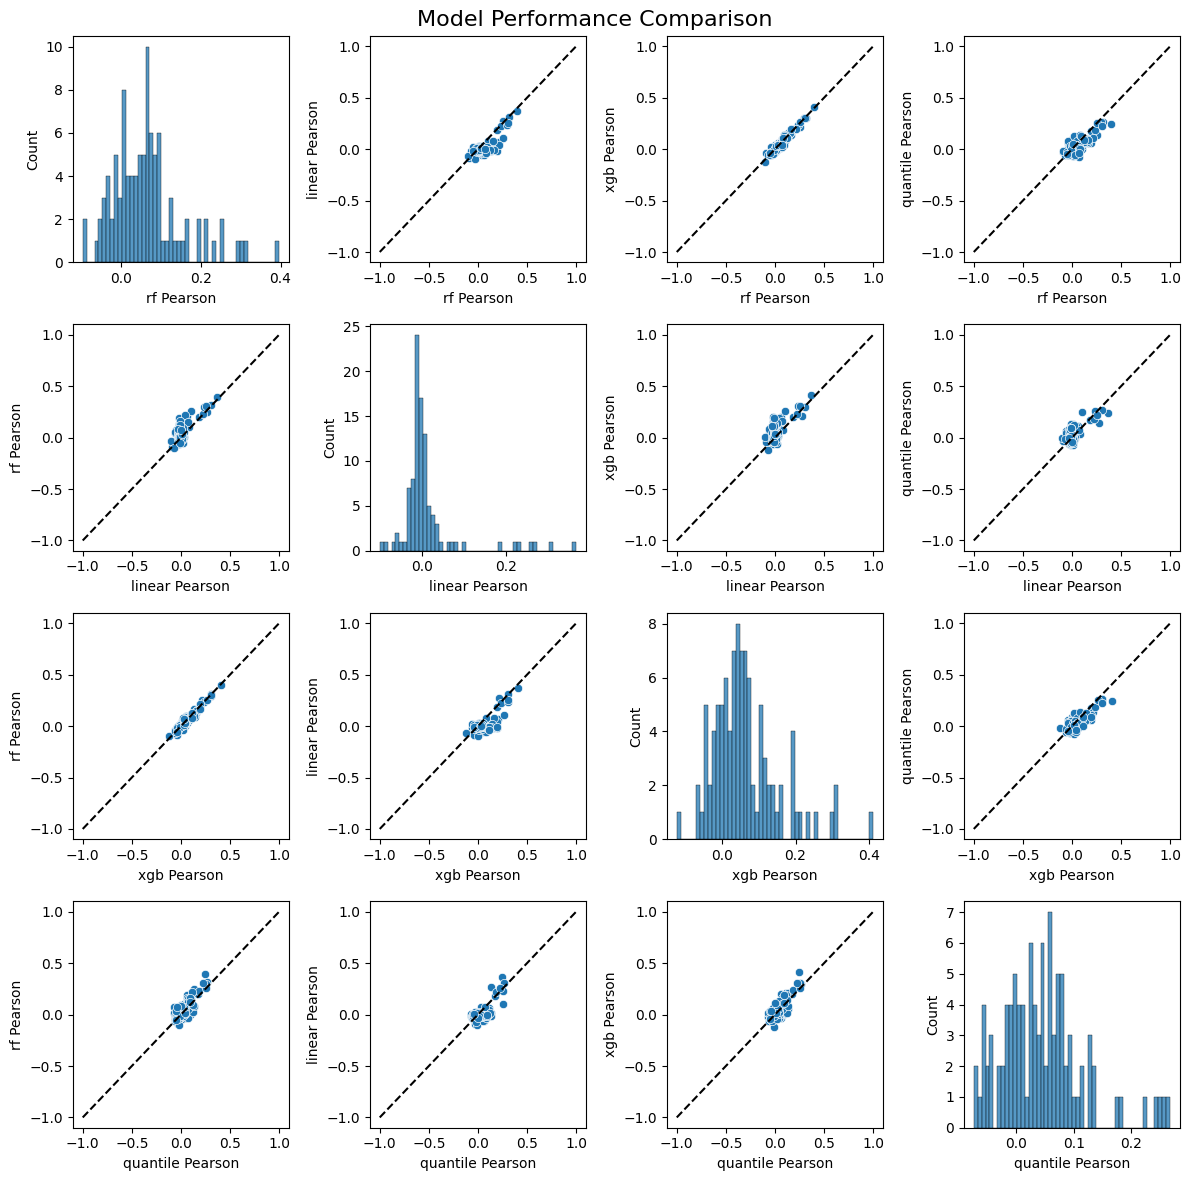

In [49]:
# Create a 3x3 grid of plots
import matplotlib.pyplot as plt
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
fig.suptitle('Model Performance Comparison', fontsize=16)

# Get unique models
models = df['model'].unique()

# Create scatter plots for off-diagonal elements
for i, model1 in enumerate(models):
    for j, model2 in enumerate(models):
        x = df.loc[df['model'] == model1, 'test_pearson'].values
        y = df.loc[df['model'] == model2, 'test_pearson'].values
        tmp_df = pd.DataFrame({'x': x, 'y': y})
        if i != j:
            # Create scatter plot
            sns.scatterplot(
                data=tmp_df,
                x='x',
                y='y',
                ax=axes[i, j]
            )
            # plot an x = y line
            axes[i, j].plot([-1, 1], [-1, 1], 'k--')
            axes[i, j].set_xlabel(f'{model1} Pearson')
            axes[i, j].set_ylabel(f'{model2} Pearson')
        else:
            # Create histogram for diagonal elements
            sns.histplot(
                data=df[df['model'] == model1],
                x='test_pearson',
                ax=axes[i, j],
                bins=50
            )
            axes[i, j].set_xlabel(f'{model1} Pearson')
            axes[i, j].set_ylabel('Count')

plt.tight_layout()
plt.show()
